<a href="https://colab.research.google.com/github/DANUSHMATHI2002/APPLIED-DATA-SCIENCE-A2C-F/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Importing Libraries**

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

**2.Loading the dataset**

In [ ]:
# Loading the dataset
data = pd.read_csv('/content/customer.csv')

**3.Statistical Summary**

In [ ]:
print("Statistical Summary")
data.describe()


Statistical Summary


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**4. Generating Additional Statistics**

In [ ]:
summary = data.describe()

# Add additional statistics: skewness and kurtosis
summary.loc['skew'] = data.skew()
summary.loc['kurt'] = data.kurtosis()

# Print the summary
summary

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000
skew,0.760951,-1.283627,2.561323,4.053755,3.587429,5.907986,3.631851,11.151586
kurt,-1.427463,-0.100111,11.536408,24.669398,20.914670,54.689281,19.009464,170.694939


**5.Correlation Matrix**

In [ ]:
# Correlation matrix
print("Correlation Matrix:")
data.corr()

Correlation Matrix:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


**6.Additional Statistics**

In [ ]:

# Generating basic statistical summary
summary = data.describe()

# Calculating Median Absolute Deviation (MAD)
mad = data.apply(lambda x: (x - x.median()).abs().median())
summary.loc['mad'] = mad

# other statistics
summary.loc['median'] = data.median()
summary.loc['range'] = data.max() - data.min()  # Range
summary.loc['iqr'] = data.quantile(0.75) - data.quantile(0.25)  # Interquartile Range
summary.loc['cv'] = (data.std() / data.mean()) * 100  # Coefficient of Variation
summary.loc['unique'] = data.nunique()  # Count of Unique Values
summary.loc['missing'] = data.isnull().sum()  # Count of Missing Values

# Print the summary
print("Statistical Summary:")
summary


Statistical Summary:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000
mad,0.000000,0.000000,5919.500000,2460.000000,3093.500000,1084.500000,715.500000,637.500000
median,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000


**7.Scatter plot**
    

*Show the relationship between Fresh and Frozen sales,with a legend based on the region*

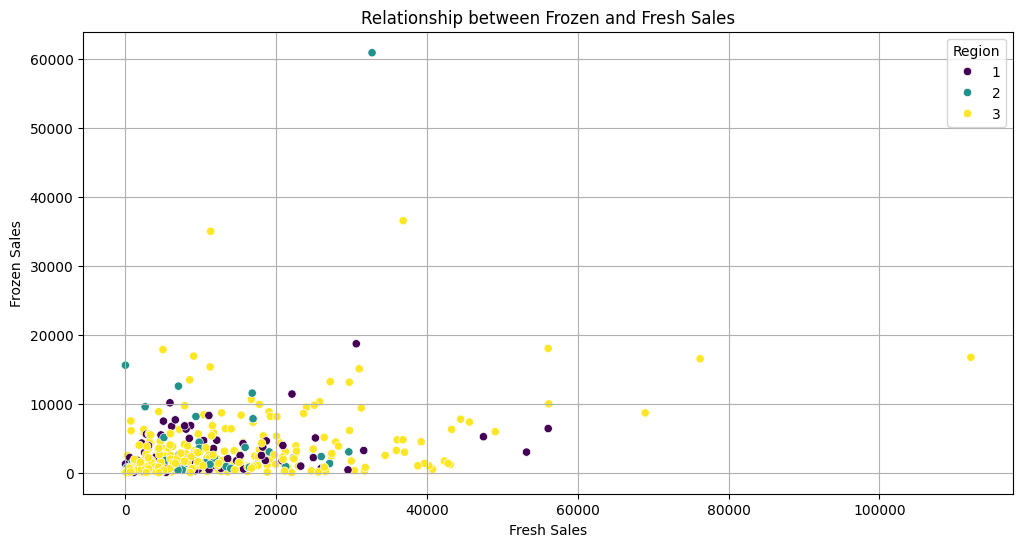

In [ ]:
def plot_sales_relationship(data):

    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=data, x='Fresh', y='Frozen', hue='Region', palette='viridis', legend='full')
    plt.title('Relationship between Frozen and Fresh Sales')
    plt.xlabel('Fresh Sales')
    plt.ylabel('Frozen Sales')
    plt.grid()
    plt.legend(title='Region')
    plt.show()
plot_sales_relationship(data)

**8. Bar Chart**

*Compare total Grocery sales across different regions, indicating the regions*

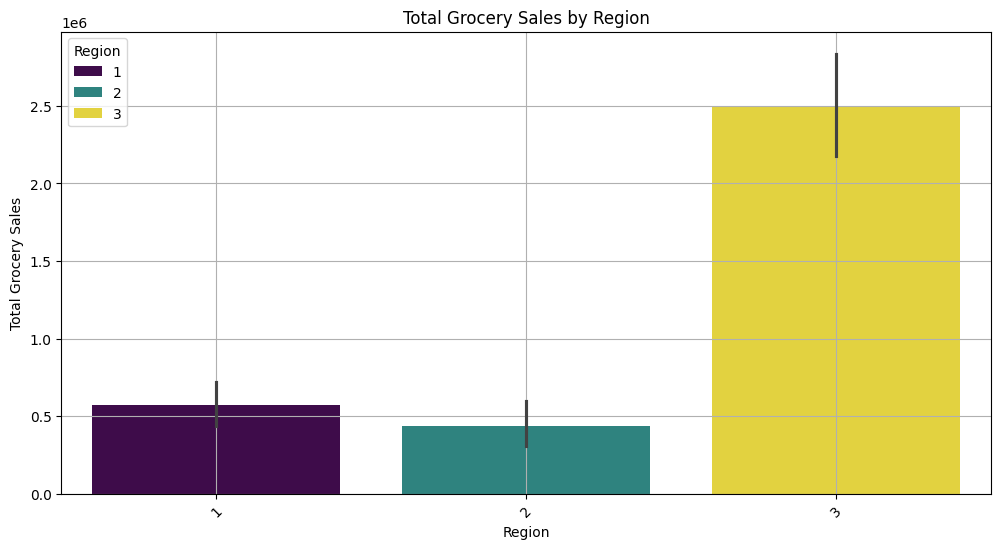

In [ ]:
def plot_sales_by_region(data):

    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='Region', y='Grocery', estimator=sum, palette='viridis', hue='Region')
    plt.title('Total Grocery Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Grocery Sales')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend(title='Region')
    plt.show()
plot_sales_by_region(data)

**9.Histogram**

*To show the distribution of Milk sales*

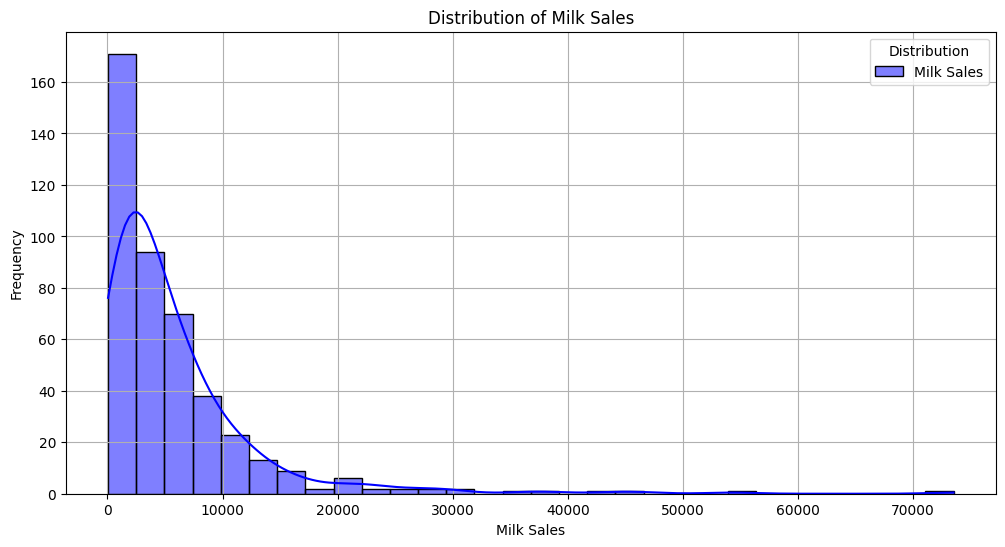

In [ ]:
def plot_sales_histogram(data):

    plt.figure(figsize=(12, 6))
    sns.histplot(data['Milk'], bins=30, kde=True, color='blue', label='Milk Sales')  # Add color and label
    plt.title('Distribution of Milk Sales')
    plt.xlabel('Milk Sales')
    plt.ylabel('Frequency')
    plt.grid()
    plt.legend(title='Distribution')
    plt.show()
plot_sales_histogram(data)

**10.Normalize the data**

In [ ]:
# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 2:])
print(pd.DataFrame(data_scaled).describe())


                  0           1             2             3             4  \
count  4.400000e+02  440.000000  4.400000e+02  4.400000e+02  4.400000e+02   
mean  -3.431598e-17    0.000000 -4.037175e-17  3.633457e-17  2.422305e-17   
std    1.001138e+00    1.001138  1.001138e+00  1.001138e+00  1.001138e+00   
min   -9.496831e-01   -0.778795 -8.373344e-01 -6.283430e-01 -6.044165e-01   
25%   -7.023339e-01   -0.578306 -6.108364e-01 -4.804306e-01 -5.511349e-01   
50%   -2.767602e-01   -0.294258 -3.366684e-01 -3.188045e-01 -4.336004e-01   
75%    3.905226e-01    0.189092  2.849105e-01  9.946441e-02  2.184822e-01   
max    7.927738e+00    9.183650  8.936528e+00  1.191900e+01  7.967672e+00   

                  5  
count  4.400000e+02  
mean  -8.074349e-18  
std    1.001138e+00  
min   -5.402644e-01  
25%   -3.964005e-01  
50%   -1.985766e-01  
75%    1.048598e-01  
max    1.647845e+01  


**11.Fitting KMeans Algorithm with 2 Clusters**

In [ ]:
# Fit the KMeans model with 2 clusters
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans_2.fit(data_scaled)

# Calculating and printing inertia for 2 clusters
print(f"Inertia for 2 clusters: {kmeans_2.inertia_}")


Inertia for 2 clusters: 2266.9552665832457


**12.Elbow Method (Plotting SSE vs Number of Clusters)**

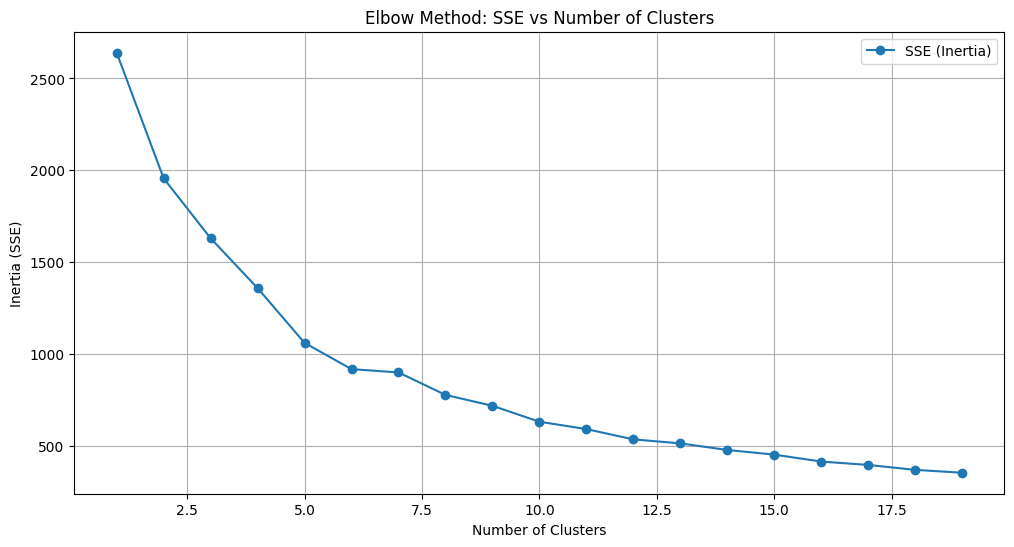

In [ ]:

SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# Converting the results into a DataFrame and plotting the SSE (Elbow Method)
frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE': SSE})

plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', label='SSE (Inertia)')
plt.title('Elbow Method: SSE vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.grid(True)
plt.legend()
plt.show()


**13.Adding Cluster Labels and Counting Points in Each Cluster**

In [ ]:
# Fitting the KMeans model with 5 clusters
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_5.fit(data_scaled)

# Predicting the cluster for the scaled data
pred_5 = kmeans_5.predict(data_scaled)

# Creating a DataFrame to analyze clustering results
frame = pd.DataFrame(data_scaled, columns=[f'Feature_{i+1}' for i in range(data_scaled.shape[1])])
frame['cluster'] = pred_5

# Displaying the count of data points in each cluster
print("Cluster counts for 5 clusters:")
frame['cluster'].value_counts()


Cluster counts for 5 clusters:


,count
cluster,
3,272
0,96
1,59
2,11
4,2


**14.  Plot the clusters with their centroids.**

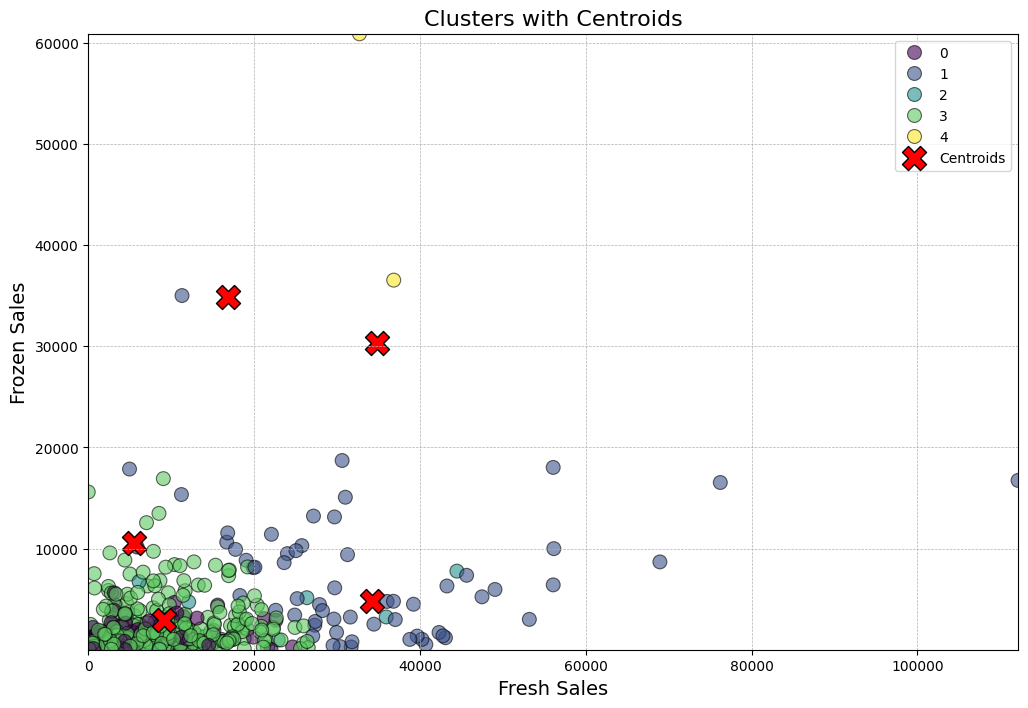

In [ ]:


def plot_clusters_with_centroids(data, model, scaler):

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=data['Fresh'], y=data['Frozen'], hue=model.labels_, palette='viridis', s=100, alpha=0.6, edgecolor='k')

    # Plotting the centroids
    centroids = model.cluster_centers_
    # Inverse transform the centroids to get them back to original scale
    centroids_original = scaler.inverse_transform(centroids)
    plt.scatter(centroids_original[:, 0], centroids_original[:, 1], c='red', s=300, marker='X', label='Centroids', edgecolor='black')

    # Adding style
    plt.title('Clusters with Centroids', fontsize=16)
    plt.xlabel('Fresh Sales', fontsize=14)
    plt.ylabel('Frozen Sales', fontsize=14)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xlim(data['Fresh'].min() - 10, data['Fresh'].max() + 10)
    plt.ylim(data['Frozen'].min() - 10, data['Frozen'].max() + 10)
    plt.show()

plot_clusters_with_centroids(data, kmeans_5, scaler)


**15.Clustering Function**

In [ ]:
def perform_clustering(data, max_clusters=10):

    best_score = -1
    best_k = 0
    kmeans_model = None

    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)

        if score > best_score:
            best_score = score
            best_k = k
            kmeans_model = kmeans

    return kmeans_model, best_k, best_score

**16.Fitting Function**

In [ ]:
def perform_fitting(X, y):

    model = LinearRegression()
    model.fit(X, y)
    return model

 **17.Clustering Quality Analysis**

In [ ]:
def plot_clustering_results(model, data, n_clusters):
    """Plot the clustering results with cluster centers."""
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=model.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)

    centers = model.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')

    plt.title(f'KMeans Clustering with {n_clusters} Clusters')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

 **18.Fitting Quality Analysis**

In [ ]:
def plot_fitting_results(model, X, y):
    """Plot the fitting results with confidence intervals."""
    plt.figure(figsize=(10, 6))

    # Predictions
    y_pred = model.predict(X)

    # Plotting the actual vs predicted
    plt.scatter(X, y, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X, y_pred, color='red', label='Predicted', alpha=0.5)

    # Confidence intervals (for simplicity, using a fixed range)
    plt.fill_between(X.flatten(), y_pred - 1, y_pred + 1, color='gray', alpha=0.2, label='Confidence Interval')

    plt.title('Fitting Results')
    plt.xlabel('Independent Variable')
    plt.ylabel('Dependent Variable')
    plt.legend()
    plt.show()

**19.Fitting results with confidence intervals**

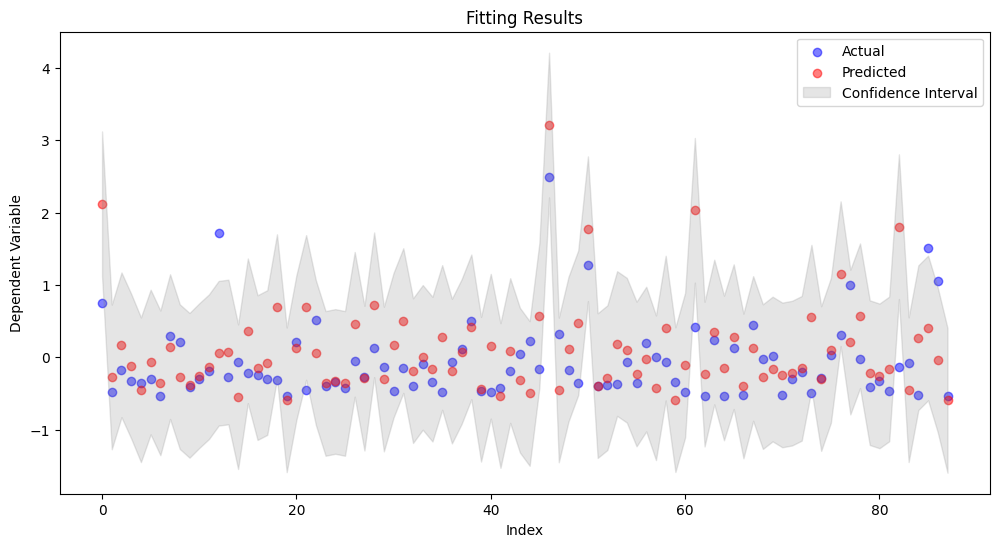

In [ ]:
def plot_fitting_results(model, X, y):
    """Plot the fitting results with confidence intervals."""
    plt.figure(figsize=(12, 6))

    # Predictions
    y_pred = model.predict(X)

    # Plotting the actual vs predicted
    plt.scatter(range(len(y)), y, color='blue', label='Actual', alpha=0.5)
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.5)

    # Confidence intervals
    plt.fill_between(range(len(y_pred)), y_pred - 1, y_pred + 1, color='gray', alpha=0.2, label='Confidence Interval')

    plt.title('Fitting Results')
    plt.xlabel('Index')
    plt.ylabel('Dependent Variable')
    plt.legend()
    plt.show()

# Fitting
X = data_scaled[:, :-1]  # Independent variables
y = data_scaled[:, -1]   # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = perform_fitting(X_train, y_train)

plot_fitting_results(linear_model, X_test, y_test)

**20.Line Fitting: Predicting Frozen Sales based on Fresh Sales**

Model Coefficient: 0.14021780409103918
Model Intercept: 1316.745376384817
R-squared: 0.13


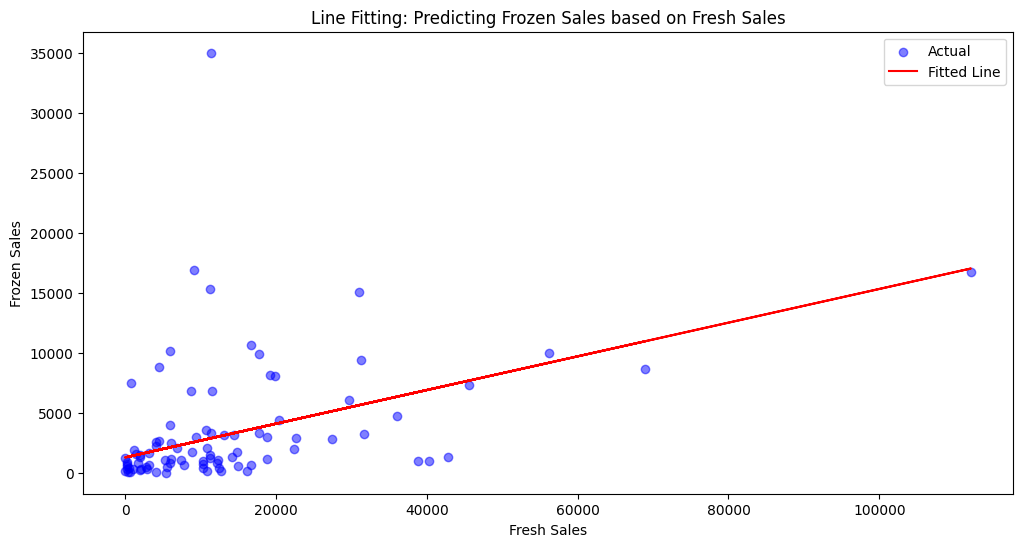

In [ ]:


def line_fitting(data):
    """
    Function to fit a line for predicting Frozen Sales based on Fresh Sales.
    This will include both visualization and model results.
    """
    # Replace these columns with your actual column names
    X = data[['Fresh']]  # Independent variable (predictor)
    y = data['Frozen']  # Dependent variable (target)

    # Split the data into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Model results
    coefficient = model.coef_[0]  # The slope of the fitted line
    intercept = model.intercept_  # The intercept of the fitted line
    r_squared = model.score(X_test, y_test)  # R-squared score on the test set

    print(f"Model Coefficient: {coefficient}")
    print(f"Model Intercept: {intercept}")
    print(f"R-squared: {r_squared:.2f}")

    # Plotting the actual vs predicted values
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual")
    plt.plot(X_test, y_pred, color='red', label="Fitted Line")
    plt.title("Line Fitting: Predicting Frozen Sales based on Fresh Sales")
    plt.xlabel("Fresh Sales")
    plt.ylabel("Frozen Sales")
    plt.legend()
    plt.show()

line_fitting(data)
